# Julian's Work

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl
import seaborn as sns

%matplotlib inline

In [2]:
Hdata = pd.read_csv("echocardiogram.csv", usecols=[0,1,2,3,4,5,6,7,8],
                   names= ("MthLive", "Alive","Age","Fluid","Contracility",
                           "EPSS","LVDD", "WallMotion","WM_index"),
                   na_values='?')

# name, mult, group are deemed irrelevant for this study. alive-at-1 can be ascertained by mthlive
#Refer to documentation: echocardiogram.names.txt

# these columns omitted from read file with usecols=... 0:8 did not work for some reason...
# there was a ? entry that encoded all series as objects (mix), rather than ready for math!
# all variables were imported as float64. Should Fluid, Alive be booleon.. what about others integers?

In [3]:
Hdata['Alive'] = Hdata['Alive'].astype('bool')
Hdata['Fluid'] = Hdata['Fluid'].astype('bool')

In [4]:
Hdata.mean()

MthLive         22.182923
Alive            0.333333
Age             62.925425
Fluid            0.189394
Contracility     0.216734
EPSS            12.164769
LVDD             4.763157
WallMotion      14.438125
WM_index         1.382748
dtype: float64

In [5]:
Hdata.head()

,MthLive,Alive,Age,Fluid,Contracility,EPSS,LVDD,WallMotion,WM_index
0,11.0,False,71.0,False,0.260,9.000,4.600,14.0,1.00
1,19.0,False,72.0,False,0.380,6.000,4.100,14.0,1.70
2,16.0,False,55.0,False,0.260,4.000,3.420,14.0,1.00
3,57.0,False,60.0,False,0.253,12.062,4.603,16.0,1.45
4,19.0,True,57.0,False,0.160,22.000,5.750,18.0,2.25


In [48]:
Hdata.groupby('Alive').corr()

Age  Contracility      EPSS     Fluid      LVDD  \
Alive                                                                      
False Age           1.000000     -0.027856 -0.051866  0.007462  0.183123   
      Contracility -0.027856      1.000000 -0.325989 -0.034798 -0.292048   
      EPSS         -0.051866     -0.325989  1.000000  0.013253  0.548062   
      Fluid         0.007462     -0.034798  0.013253  1.000000  0.005042   
      LVDD          0.183123     -0.292048  0.548062  0.005042  1.000000   
      MthLive      -0.001913      0.080683 -0.120858 -0.050840 -0.109126   
      WM_index      0.083385     -0.163725  0.317492  0.125409  0.118869   
      WallMotion    0.029264     -0.100848  0.275306  0.093873  0.037020   
True  Age           1.000000      0.099351 -0.061565 -0.065018 -0.091085   
      Contracility  0.099351      1.000000 -0.210446  0.226363 -0.302031   
      EPSS         -0.061565     -0.210446  1.000000  0.033347  0.685494   
      Fluid        -0.065018      0.226363  0.033347  1.000000  0.057392   
      LVDD         -0.091085     -0.302031  0.685494  0.057392  1.000000   
      MthLive       0.028391     -0.046730 -0.002683 -0.011989  0.134096   
      WM_index     -0.235190     -0.205617  0.324679  0.040667  0.282695   
      WallMotion   -0.162611     -0.153554  0.360148  0.119247  0.157954   

                     MthLive  WM_index  WallMotion  
Alive                                               
False Age          -0.001913  0.083385    0.029264  
      Contracility  0.080683 -0.163725   -0.100848  
      EPSS         -0.120858  0.317492    0.275306  
      Fluid        -0.050840  0.125409    0.093873  
      LVDD         -0.109126  0.118869    0.037020  
      MthLive       1.000000 -0.068517   -0.123184  
      WM_index     -0.068517  1.000000    0.707783  
      WallMotion   -0.123184  0.707783    1.000000  
True  Age           0.028391 -0.235190   -0.162611  
      Contracility -0.046730 -0.205617   -0.153554  
      EPSS         -0.002683  0.324679    0.360148  
      Fluid        -0.011989  0.040667    0.119247  
      LVDD          0.134096  0.282695    0.157954  
      MthLive       1.000000 -0.235580   -0.220395  
      WM_index     -0.235580  1.000000    0.536202  
      WallMotion   -0.220395  0.536202    1.000000

In [7]:
Hdata.corr()

,MthLive,Alive,Age,Fluid,Contracility,EPSS,LVDD,WallMotion,WM_index
MthLive,1.000000,-0.711073,-0.207691,-0.153606,0.241328,-0.295099,-0.230969,-0.292460,-0.354789
Alive,-0.711073,1.000000,0.309236,0.191404,-0.294011,0.330701,0.264787,0.272232,0.395926
Age,-0.207691,0.309236,1.000000,0.041149,-0.083279,0.045540,0.173159,0.035560,0.069187
Fluid,-0.153606,0.191404,0.041149,1.000000,-0.009492,0.073149,0.063501,0.143504,0.142396
Contracility,0.241328,-0.294011,-0.083279,-0.009492,1.000000,-0.357718,-0.349243,-0.171558,-0.248676
EPSS,-0.295099,0.330701,0.045540,0.073149,-0.357718,1.000000,0.624183,0.371534,0.405519
LVDD,-0.230969,0.264787,0.173159,0.063501,-0.349243,0.624183,1.000000,0.146372,0.247416
WallMotion,-0.292460,0.272232,0.035560,0.143504,-0.171558,0.371534,0.146372,1.000000,0.645427
WM_index,-0.354789,0.395926,0.069187,0.142396,-0.248676,0.405519,0.247416,0.645427,1.000000


ValueError: max must be larger than min in range parameter.

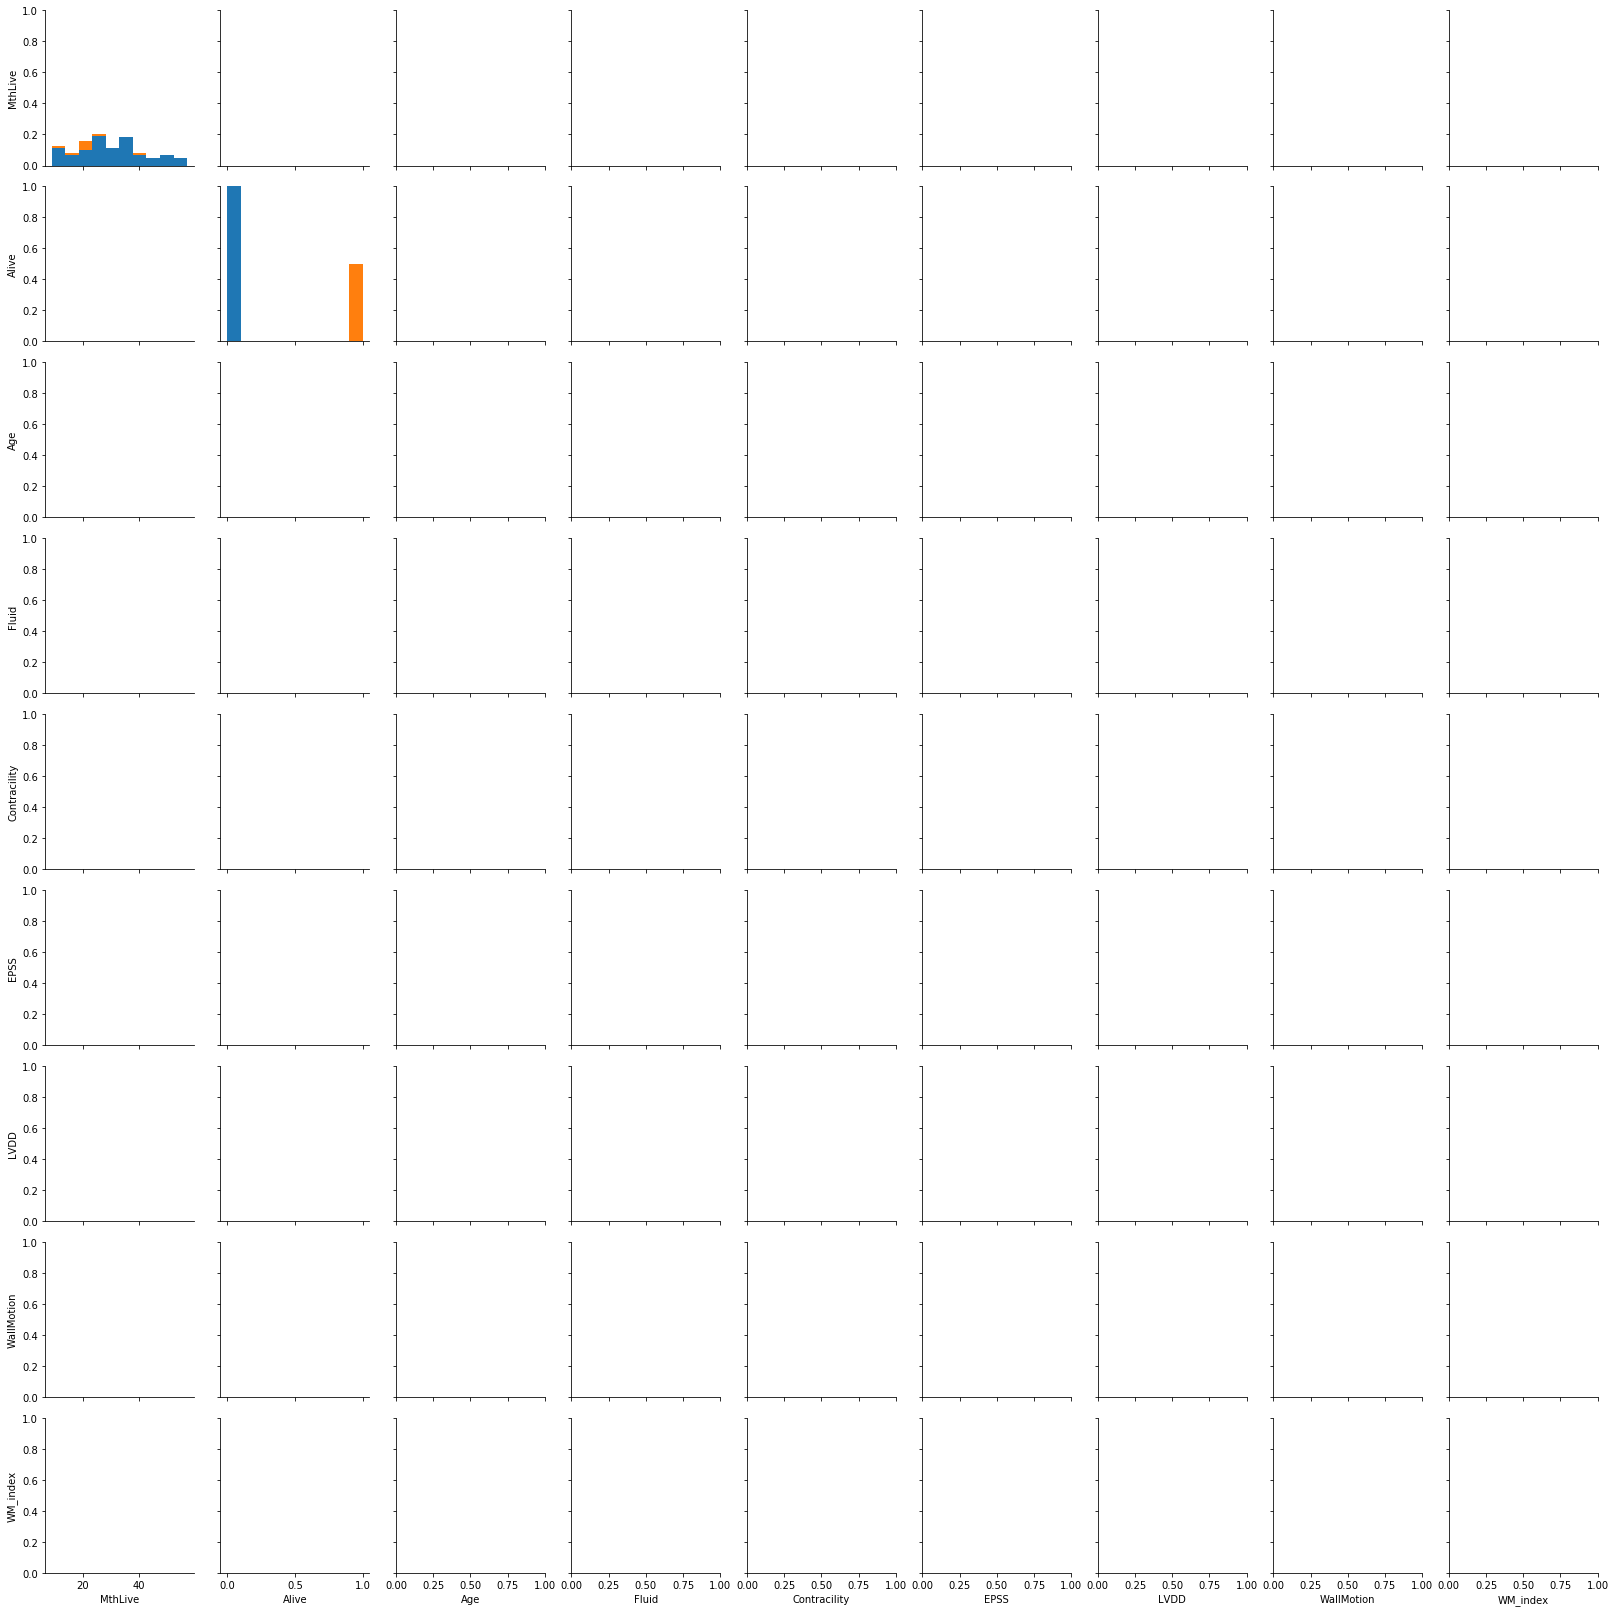

In [8]:
sns.pairplot(data=Hdata, hue='Alive')

# Goku's Work

In [9]:
#Setting up Dataframe containing only the data for those who are not still alive

HdataDead=Hdata[Hdata.Alive != True]
HdataDead=HdataDead.dropna()

In [10]:
HdataDead

,MthLive,Alive,Age,Fluid,Contracility,EPSS,LVDD,WallMotion,WM_index
0,11.0,False,71.0,False,0.260,9.000,4.600,14.00,1.000
1,19.0,False,72.0,False,0.380,6.000,4.100,14.00,1.700
2,16.0,False,55.0,False,0.260,4.000,3.420,14.00,1.000
3,57.0,False,60.0,False,0.253,12.062,4.603,16.00,1.450
5,26.0,False,68.0,False,0.260,5.000,4.310,12.00,1.000
6,13.0,False,62.0,False,0.230,31.000,5.430,22.50,1.875
7,50.0,False,60.0,False,0.330,8.000,5.250,14.00,1.000
8,19.0,False,46.0,False,0.340,0.000,5.090,16.00,1.140
9,25.0,False,54.0,False,0.140,13.000,4.490,15.50,1.190
11,52.0,False,62.0,True,0.450,9.000,3.600,16.00,1.140


In [11]:
#Finding Minimum and Maximum Participant Ages to Setup Age Groupings
HdataDead.Age.min()

35.0

In [12]:
HdataDead.Age.max()

79.0

In [13]:
#Setting up Age Groupings

bins5 = np.arange(HdataDead.Age.min()-5,HdataDead.Age.max()+5,5)
bins5 = bins5.tolist()

bins2 = np.arange(HdataDead.Age.min()-3,HdataDead.Age.max()+2,2)
bins2 = bins2.tolist()


In [14]:
bins5

[30.0, 35.0, 40.0, 45.0, 50.0, 55.0, 60.0, 65.0, 70.0, 75.0, 80.0]

In [15]:
bins2

[32.0,
 34.0,
 36.0,
 38.0,
 40.0,
 42.0,
 44.0,
 46.0,
 48.0,
 50.0,
 52.0,
 54.0,
 56.0,
 58.0,
 60.0,
 62.0,
 64.0,
 66.0,
 68.0,
 70.0,
 72.0,
 74.0,
 76.0,
 78.0,
 80.0]

In [16]:
#Assign Age Groupings for 5-Year Increments
HdataDead['AgeRangeInc5'] = pd.cut(HdataDead['Age'],bins5)
#Assign Age Groupings for 2-Year Increments
HdataDead['AgeRangeInc2'] = pd.cut(HdataDead['Age'],bins2)

#Create New Dataframes to Split Existing Dataframe to Two Smaller Dataframes
#Purpose is to Have Less Groupings per Plot for 2-Year Increments
HdataDeadLow=HdataDead[Hdata.Age < 55]
HdataDeadHigh=HdataDead[Hdata.Age >= 55]

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [17]:
#Show Data of Dead Participants Along With Age Groupings
HdataDead

,MthLive,Alive,Age,Fluid,Contracility,EPSS,LVDD,WallMotion,WM_index,AgeRangeInc5,AgeRangeInc2
0,11.0,False,71.0,False,0.260,9.000,4.600,14.00,1.000,"(70.0, 75.0]","(70.0, 72.0]"
1,19.0,False,72.0,False,0.380,6.000,4.100,14.00,1.700,"(70.0, 75.0]","(70.0, 72.0]"
2,16.0,False,55.0,False,0.260,4.000,3.420,14.00,1.000,"(50.0, 55.0]","(54.0, 56.0]"
3,57.0,False,60.0,False,0.253,12.062,4.603,16.00,1.450,"(55.0, 60.0]","(58.0, 60.0]"
5,26.0,False,68.0,False,0.260,5.000,4.310,12.00,1.000,"(65.0, 70.0]","(66.0, 68.0]"
6,13.0,False,62.0,False,0.230,31.000,5.430,22.50,1.875,"(60.0, 65.0]","(60.0, 62.0]"
7,50.0,False,60.0,False,0.330,8.000,5.250,14.00,1.000,"(55.0, 60.0]","(58.0, 60.0]"
8,19.0,False,46.0,False,0.340,0.000,5.090,16.00,1.140,"(45.0, 50.0]","(44.0, 46.0]"
9,25.0,False,54.0,False,0.140,13.000,4.490,15.50,1.190,"(50.0, 55.0]","(52.0, 54.0]"
11,52.0,False,62.0,True,0.450,9.000,3.600,16.00,1.140,"(60.0, 65.0]","(60.0, 62.0]"


D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Distribution of Participants (Not Alive)')

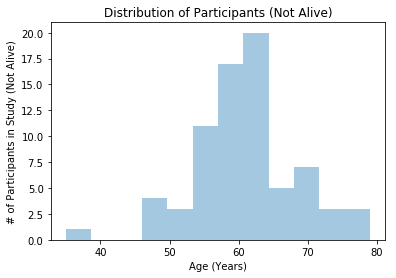

In [63]:
#Age Distribution of Participants who Died
ax = sns.distplot(HdataDead['Age'],kde = False)
mpl.xlabel('Age (Years)')
mpl.ylabel('# of Participants in Study (Not Alive)')
mpl.title('Distribution of Participants (Not Alive)')

Text(0.5,1,'Violin Plots - # of Months Lived for Each Age Group (Increments of 5 Years)')

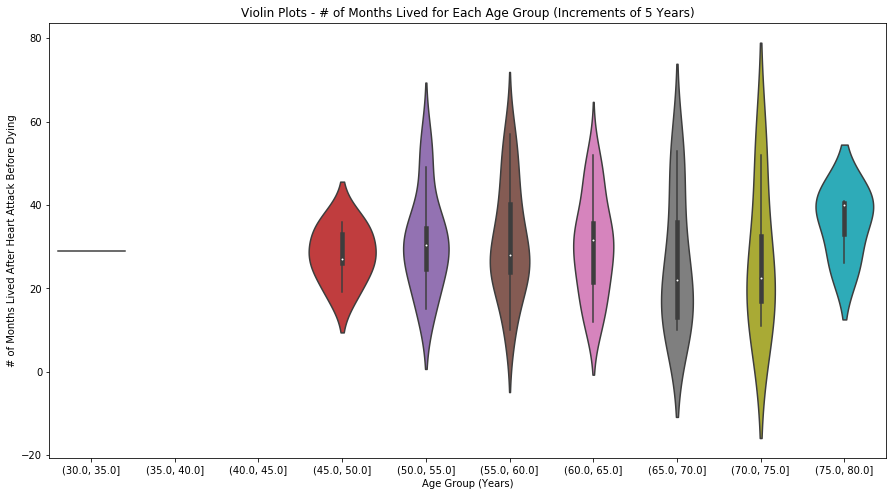

In [64]:
#Violin Plot for Data Grouped by 5-Year Increments - Age vs Months Survived Distributions
a4_dims = (15, 8)
fig, ax = mpl.subplots(figsize=a4_dims)
sns.violinplot(ax=ax, x="AgeRangeInc5", y="MthLive", data=HdataDead)
mpl.xlabel('Age Group (Years)')
mpl.ylabel('# of Months Lived After Heart Attack Before Dying')
mpl.title('Violin Plots - # of Months Lived for Each Age Group (Increments of 5 Years)')

Text(0.5,1,'Violin Plots - # of Months Lived for Each Age Group (Increments of 2 Years, 54 and Younger)')

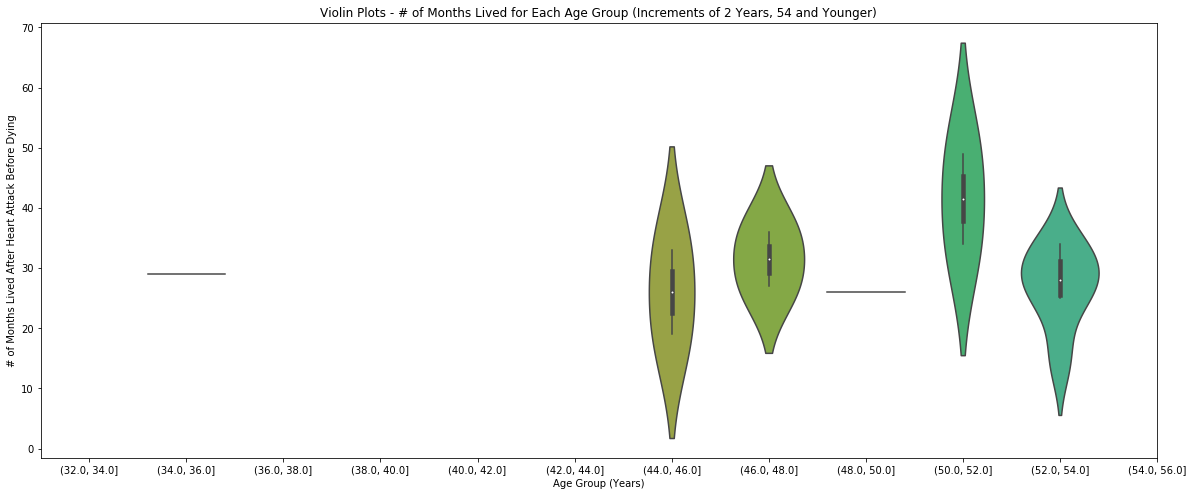

In [65]:
#Violin Plot for Data Grouped by 2-Year Increments - 54 and Under
#Age vs Months Survived Distributions
a4_dims = (20, 8)
fig2, ax = mpl.subplots(figsize=a4_dims)
sns.violinplot(ax=ax, x="AgeRangeInc2", y="MthLive", data=HdataDeadLow, fit_reg=False)
mpl.xlim(right=11)
mpl.xlabel('Age Group (Years)')
mpl.ylabel('# of Months Lived After Heart Attack Before Dying')
mpl.title('Violin Plots - # of Months Lived for Each Age Group (Increments of 2 Years, 54 and Younger)')

Text(0.5,1,'Violin Plots - # of Months Lived for Each Age Group (Increments of 2 Years, Over 54)')

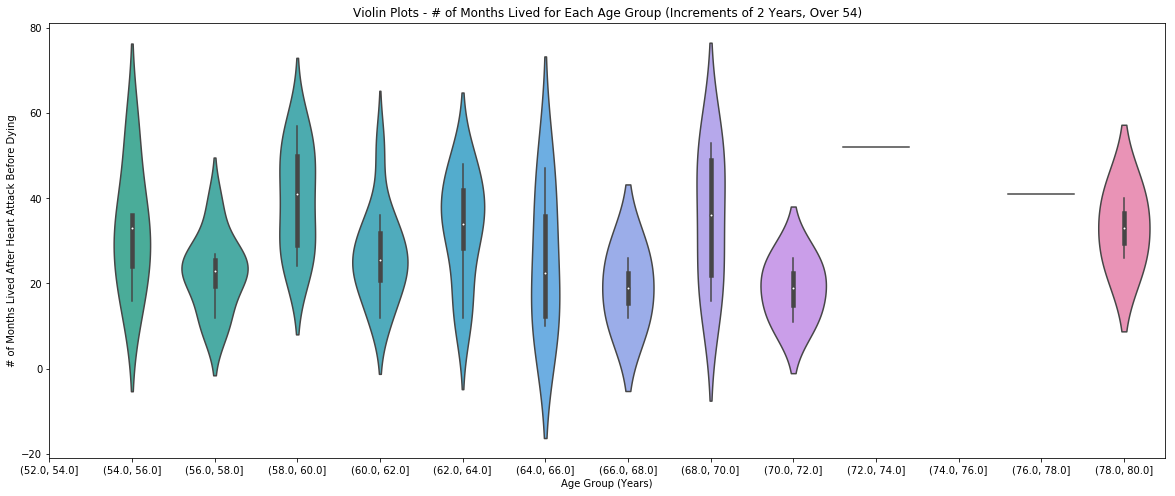

In [66]:
#Violin Plot for Data Grouped by 2-Year Increments - Over 54
#Age vs Months Survived Distributions
a4_dims = (20, 8)
fig2, ax = mpl.subplots(figsize=a4_dims)
sns.violinplot(ax=ax, x="AgeRangeInc2", y="MthLive", data=HdataDeadHigh, fit_reg=False)
mpl.xlim(left=10)
mpl.xlabel('Age Group (Years)')
mpl.ylabel('# of Months Lived After Heart Attack Before Dying')
mpl.title('Violin Plots - # of Months Lived for Each Age Group (Increments of 2 Years, Over 54)')

D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'ECDF - Proportion of Participants (Not Alive) vs # of Months Lived After Heart Attack')

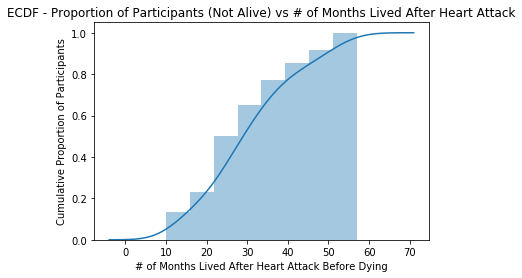

In [67]:
#ECDF for Participants (Not Alive) and the Number of Months They Lived After a Heart Attack
sns.distplot(HdataDead['MthLive'], hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))
mpl.xlabel('# of Months Lived After Heart Attack Before Dying')
mpl.ylabel('Cumulative Proportion of Participants')
mpl.title('ECDF - Proportion of Participants (Not Alive) vs # of Months Lived After Heart Attack')

In [68]:
# Will need to do a multi-layer plot or multiple plots for each age group, though I cannot figure out how at the moment.

In [69]:
#End Goku's Section